# Heart attack analysis. EDA and prediction

We have data on patients seen by a cardiologist. The main goal of this notebook is to build a machine learning model, that will be able to predict the risk of a heart attack based on a patient's health condition.

Here we have the description of the features:

age - age in years

sex - sex (0 = female; 1 = male)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trtbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (0 = false; 1 = true)

restecg - resting electrocardiographic results (0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality)

thalachh - maximum heart rate achieved

exng - exercise induced angina (0 = no; 1 = yes)

oldpeak - ST depression induced by exercise relative to rest

slp - the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)

caa - number of major vessels (0-4) colored by flourosopy

thall - thallium stress test (1 = fixed defect; 2 = reversable defect; 3 = normal)

output - 0 = less chance of heart attack; 1 = more chance of heart attack

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read the dataset
df=pd.read_csv('heart.csv')


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.shape

(303, 14)

In [8]:
type(df)

pandas.core.frame.DataFrame

1.The dataset includes information about 303 patients.

2.There are 13 features. Even though all of them are numeric type, only 5 are really numerical, the rest are categorical.

            categorical features : sex, cp, fbs, restecg, exng, slp, caa, thall
   
            numerical features : age, trtbps, chol, thalachh, oldpeak

3.The target is output. 0 is low risk patient, 1 is high risk patient.

4.There are no missing values.

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Cleaning


# Check for Duplicate value

In [10]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


There is one duplicate we observed and delete it

In [11]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(302, 14)

In [12]:
df.iloc[164:165,]   #[Row(Start:end-1),col(start:end)] end-1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


# Check for Null Val

In [13]:
df.isna().sum()
# df.isnull().sum()

# df.dropna()
# df.fillna()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Checking Outliers

<AxesSubplot:>

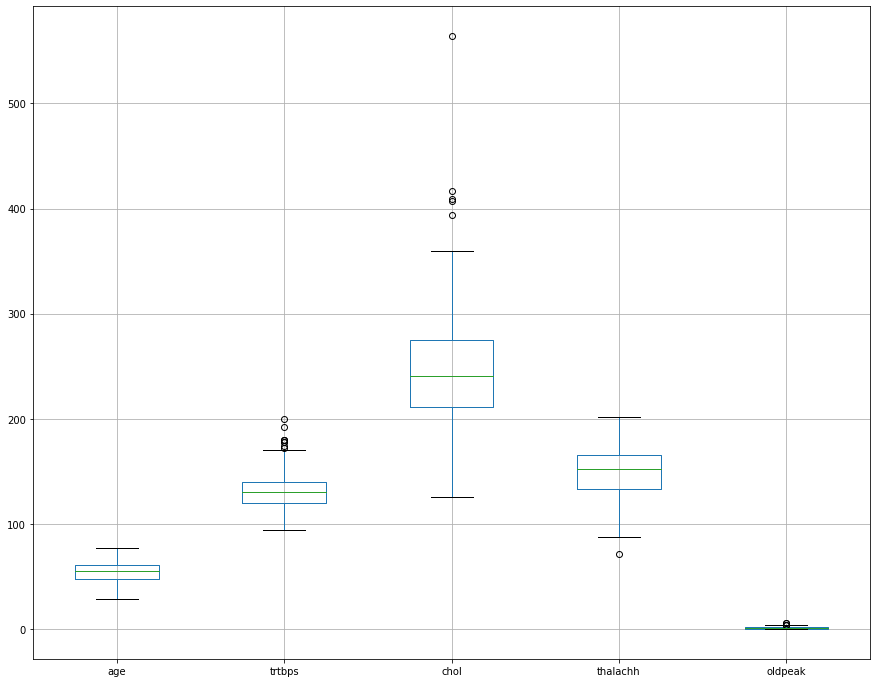

In [14]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')

plt.figure(figsize=(15,12))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak']) 

No outliers are present in age attribute but there are outliers in trtbps, chol, thalachh and oldpeak attributes. 
So we need to get the exact values of outliers using IQR method.

In [1]:
#Finding values of outliers(IQR method)
# 1. Sort the dataset in ascending order,
# 2 calculate the 1st and 3rd quartiles(Q1, Q3)
# 3  compute IQR=Q3-Q1,
# 4 compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR),
# 5 loop through the values of the dataset and check for those who fall below the lower bound 
#and above the upper bound and mark them as outliers


![image.png](attachment:image.png)

In [15]:
# Finding values of outliers(IQR method)

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in ['age','trtbps','chol','thalachh','oldpeak']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in trtbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Outliers in chol attribute : [394, 407, 409, 417, 564]
Outliers in thalachh attribute : [71]
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]


In [16]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
    
    
for i in ['trtbps','chol','thalachh','oldpeak']:
    df[i]=handle_outliers(df[i])



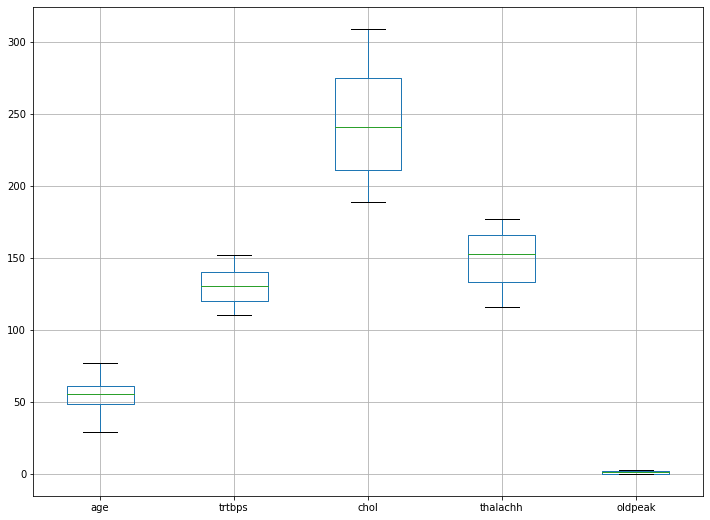

In [17]:
# verifying again with boxplot

plt.figure(figsize=(12,9))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak']);

# Visualization

In this section, we will get an idea about our patients by considering all the features separately.

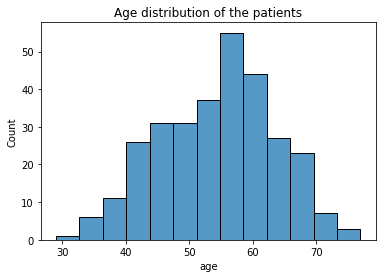

In [18]:
#Age
sns.histplot(df.age)
plt.title('Age distribution of the patients')
plt.show()

The dataset contains information about older patients, which is to be expected. The majority of the patients are older than 40.  The peak is at 57-58 years old.

In [19]:
#Gender
df.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

0=Female

1=Male

We have almost 2 times more males than females

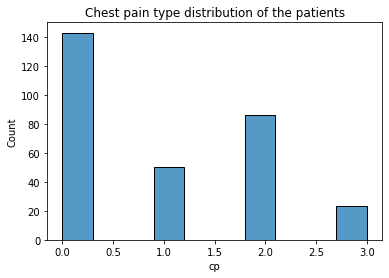

In [20]:
#Chest pain type
sns.histplot(df.cp)
plt.title('Chest pain type distribution of the patients')
plt.savefig('c11.png')
plt.show()


1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic

Almost a half of the patients have no pain in the chest

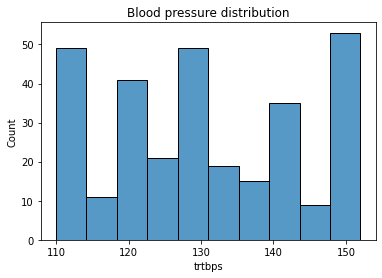

In [21]:
#Resting blood pressure
sns.histplot(df.trtbps)
plt.title('Blood pressure distribution')
plt.show()

According to the European Society of Cardiology, the following classification for blood pressure is applied:

        Category           Blood pressure

        Optimal	              < 120

        Normal	              120–129

        High normal	         130–139

        Grade 1 hypertension	140–159

        Grade 2 hypertension	160–179

        Grade 3 hypertension	 ≥ 180

In our dataset, the resting blood pressure distribution has a peak at a value of approx. 150

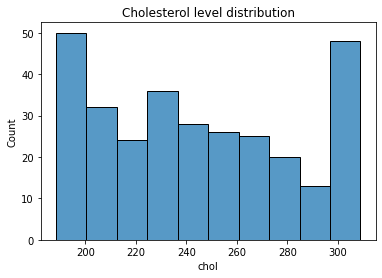

In [22]:
#Cholesterol
sns.histplot(df.chol)
plt.title('Cholesterol level distribution')
plt.show()

In [23]:
#Fasting blood sugar
df.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

Reminder: 0 means less or equal to 120 mg/dl (which is good), 1 means higher than 120 mg/dl.

The majority of the patients don't have serious sugar problems.

0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality

About 50% of the patients have hypertrophy. Only a few of the patients have ST-T wave abnormality. The rest of them have normal results.

In our dataset, highest value for thalachh is apprx. 170-180

In [24]:
#The chance of heart attack
df.output.value_counts()

1    164
0    138
Name: output, dtype: int64

 0 = less chance of heart attack; 1 = more chance of heart attack

54.3% of the patients have a high risk of heart attack, 45.7% - low risk of a heart attack.


The conclusion is that people with good health condition has a lower chance to a heart attack.

Text(0.5, 1.0, 'Correlation map')

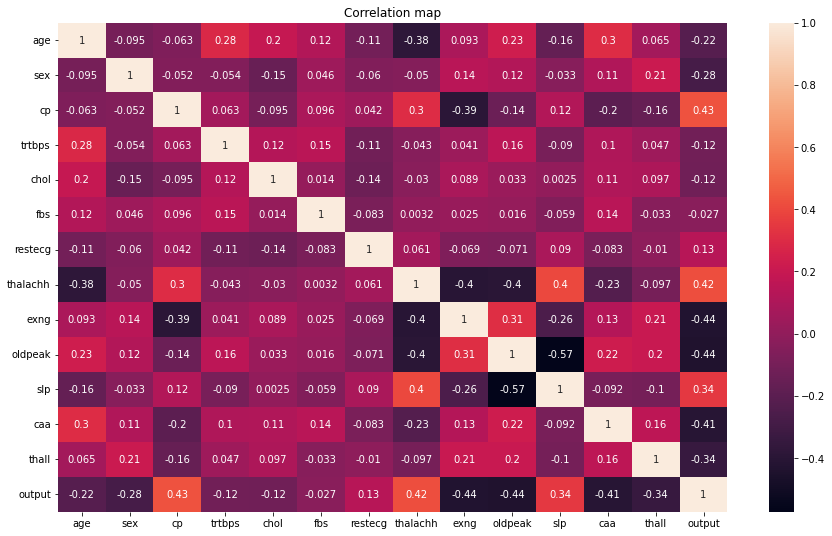

In [25]:
#Finding the correlation
plt.figure(figsize=(15,9));
sns.heatmap(df.corr(),annot=True);
# sns.heatmap()
plt.title("Correlation map")

From the above heatmap we can observe that the features 'cp', 'thalachh', 'slp' are highly correlated to output (target variable).

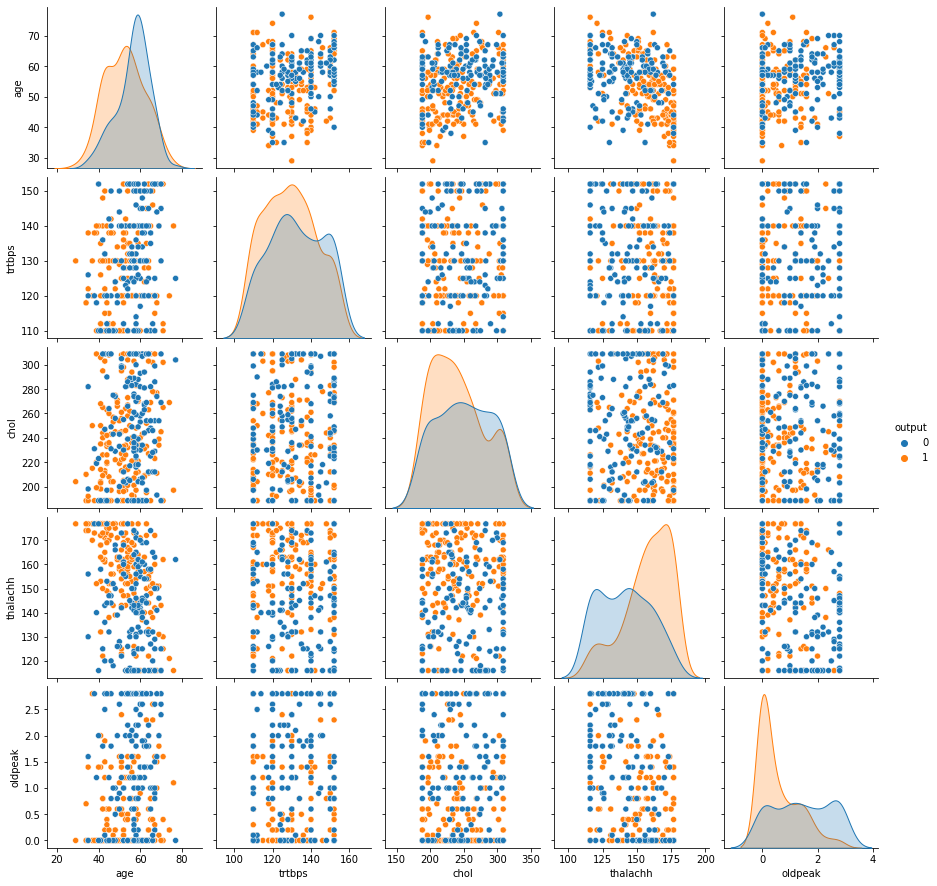

In [26]:
# pairplot for numeric columns

sns.pairplot(df[['age','trtbps','chol','thalachh','oldpeak','output']],hue='output')
# sns.pairplot(df[['age','trtbps','output']],hue='output')


From the above pair plot we can conclude that our dataset is not linearly separable.




# Conclusion  (Visualization):

1.The majority of the patients are older than 40.

2.In the dataset there are 2 times more males than females.

3.54.3% of the patients have a high risk of heart attack, 45.7% - low risk of a heart attack.

4.Age distribution of patients from the high-risk group has a peak at 57-58 ages.

5.Patients that have normal analysis results (such as electrocardiography or thallium stress test) are less likely to have a heart attack.

6.The major factors influencing heart attacks are: Chest pain, Maximum heart rate achieved, Exercise induced angina, ST depression induced by exercise relative to rest and Number of major vessels

# Feature Scaling

In [27]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,176.8,0,2.8,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,176.8,0,0.8,2,0,2,1
4,57,0,0,120.0,308.9,0,1,163.0,1,0.6,2,0,2,1


In [28]:
from sklearn.preprocessing import StandardScaler
# -infinity to infinity
# z = (X - mean)/std deviation

scale = StandardScaler()
df[['age','trtbps','chol','thalachh']]=scale.fit_transform(df[['age','trtbps','chol','thalachh']])

In [29]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,1.064668,-0.298585,1,0,0.000372,0,2.3,0,0,1,1
1,-1.928548,1,2,-0.038476,0.135392,0,1,1.369395,0,2.8,0,0,2,1
2,-1.485726,0,1,-0.038476,-1.038899,0,0,1.124197,0,1.4,2,0,2,1
3,0.174856,1,1,-0.773906,-0.222001,0,1,1.369395,0,0.8,2,0,2,1
4,0.285561,0,0,-0.773906,1.638995,0,1,0.664450,1,0.6,2,0,2,1


In [30]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,1.064668,-0.298585,1,0,0.000372,0,2.3,0,0,1,1
1,-1.928548,1,2,-0.038476,0.135392,0,1,1.369395,0,2.8,0,0,2,1
2,-1.485726,0,1,-0.038476,-1.038899,0,0,1.124197,0,1.4,2,0,2,1
3,0.174856,1,1,-0.773906,-0.222001,0,1,1.369395,0,0.8,2,0,2,1
4,0.285561,0,0,-0.773906,1.638995,0,1,0.664450,1,0.6,2,0,2,1


In [31]:
from sklearn.preprocessing import MinMaxScaler
# 0 to 1
# z = (X - min(x))/max(x) - min(x)


scale1 = MinMaxScaler()
df[['age','trtbps','chol','thalachh']]=scale1.fit_transform(df[['age','trtbps','chol','thalachh']])

In [32]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.833333,0.370124,1,0,0.559211,0,2.3,0,0,1,1
1,0.166667,1,2,0.476190,0.511203,0,1,1.000000,0,2.8,0,0,2,1
2,0.250000,0,1,0.476190,0.129461,0,0,0.921053,0,1.4,2,0,2,1
3,0.562500,1,1,0.238095,0.395021,0,1,1.000000,0,0.8,2,0,2,1
4,0.583333,0,0,0.238095,1.000000,0,1,0.773026,1,0.6,2,0,2,1


# Data Preparation

In [33]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [34]:
#split dataset in features and target variable

feature_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg','fbs','thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[feature_cols] # Features
y = df.output # Target variable

So, we are preparing the data by spliting the features as X and Y ,Here X defines the feature columns and Y defines the target variable

In [35]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200) #Training and 20% test

In [36]:
X_train.shape

(241, 13)

In [37]:
X_test.shape

(61, 13)

In [38]:
df.shape

(302, 14)

In [39]:
y_train.shape

(241,)

Here splitting the dataset into train set and test set with the size of 80% and 20%